<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Activity_Recognition_EEG__2022_1_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Function

In [1]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)



def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Starting

In [2]:
import numpy as np
import pandas as pd
#dataset=pd.read_excel("/content/drive/MyDrive/EEG_CNU_Activity Recognition/EEG_CNU_Control_Resting, walking, working and Reading_2023.01.07.xlsx")
dataset=pd.read_excel("/content/EEG_CNU_Control_Resting, walking, working and Reading_2023.01.07.xlsx")

target = "Activity"
result = {}

In [3]:
dataset.head()

,Activity,Status,Epoch,RP_Alpha_F,RP_Beta_F,RP_Theta_F,RP_Delta_F,RP_Gamma_F,RP_Alpha_O,RP_Beta_O,...,pdBSI_gamma_T,pdBSI_T,DAR,DTR,DTABR,RP_Alpha_G,RP_Beta_G,RP_Theta_G,RP_Delta_G,RP_Gamma_G
0,Resting,Control,0,0.101451,0.226173,0.109949,0.490260,0.072166,0.035895,0.020750,...,0.459030,0.214583,12.438393,5.539580,5.283557,0.358,0.640,0.750,4.03,0.221
1,Resting,Control,1,0.089052,0.205169,0.079099,0.555265,0.071416,0.061148,0.064307,...,0.330678,0.153688,8.122782,5.075034,3.541553,0.458,0.806,0.724,3.76,0.253
2,Resting,Control,2,0.126664,0.352278,0.098481,0.305308,0.117269,0.058428,0.053895,...,0.401001,0.197538,7.248717,4.694718,2.869184,0.501,1.060,0.737,3.32,0.382
3,Resting,Control,3,0.143779,0.249933,0.134372,0.386993,0.084923,0.065183,0.040459,...,0.395906,0.157050,8.925147,4.484127,4.446999,0.498,0.711,0.908,3.65,0.230
4,Resting,Control,4,0.190840,0.266358,0.204198,0.280807,0.057797,0.029943,0.016349,...,0.430493,0.155118,13.888878,5.672066,6.891941,0.430,0.569,0.849,4.00,0.150


In [4]:
dataset.shape

(1711, 43)

In [5]:
dataset[target].value_counts()

Reading    793
Walking    408
Working    267
Resting    243
Name: Activity, dtype: int64

In [6]:
set(list(dataset['Activity']))

{'Reading', 'Resting', 'Walking', 'Working'}

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [8]:
set(list(dataset['Activity']))

{0, 1, 2, 3}

###Spliting into X and y

In [9]:
X =  dataset.loc[:,dataset.columns != target]  # removing Activity 
X =  X.loc[:,X.columns != "Status"]            # removing Status
X =  X.loc[:,X.columns != "Epoch"]             # removing Epoch
y = dataset["Activity"]

X.head(10)

,RP_Alpha_F,RP_Beta_F,RP_Theta_F,RP_Delta_F,RP_Gamma_F,RP_Alpha_O,RP_Beta_O,RP_Theta_O,RP_Delta_O,RP_Gamma_O,...,pdBSI_gamma_T,pdBSI_T,DAR,DTR,DTABR,RP_Alpha_G,RP_Beta_G,RP_Theta_G,RP_Delta_G,RP_Gamma_G
0,0.101451,0.226173,0.109949,0.490260,0.072166,0.035895,0.020750,0.143885,0.795153,0.004317,...,0.459030,0.214583,12.438393,5.539580,5.283557,0.358,0.640,0.750,4.03,0.221
1,0.089052,0.205169,0.079099,0.555265,0.071416,0.061148,0.064307,0.152405,0.706267,0.015872,...,0.330678,0.153688,8.122782,5.075034,3.541553,0.458,0.806,0.724,3.76,0.253
2,0.126664,0.352278,0.098481,0.305308,0.117269,0.058428,0.053895,0.150437,0.721961,0.015279,...,0.401001,0.197538,7.248717,4.694718,2.869184,0.501,1.060,0.737,3.32,0.382
3,0.143779,0.249933,0.134372,0.386993,0.084923,0.065183,0.040459,0.198326,0.687531,0.008502,...,0.395906,0.157050,8.925147,4.484127,4.446999,0.498,0.711,0.908,3.65,0.230
4,0.190840,0.266358,0.204198,0.280807,0.057797,0.029943,0.016349,0.133276,0.817429,0.003003,...,0.430493,0.155118,13.888878,5.672066,6.891941,0.430,0.569,0.849,4.00,0.150
5,0.168103,0.226293,0.152802,0.403017,0.049784,0.042168,0.034477,0.129951,0.782358,0.011046,...,0.380013,0.158437,9.159433,4.909690,4.405570,0.494,0.687,0.812,3.79,0.221
6,0.145588,0.217267,0.152278,0.430073,0.054795,0.067864,0.057781,0.127196,0.736805,0.010354,...,0.221696,0.052372,8.562337,5.475070,4.491270,0.527,0.669,0.770,3.85,0.180
7,0.113035,0.170606,0.137140,0.535923,0.043295,0.063531,0.066093,0.139359,0.717287,0.013731,...,0.348357,0.114897,8.628646,5.287281,3.925721,0.476,0.719,0.765,3.83,0.207
8,0.171200,0.247352,0.180361,0.343544,0.057544,0.043591,0.030324,0.162614,0.758107,0.005364,...,0.402960,0.150786,10.083337,4.565816,5.384672,0.482,0.621,0.934,3.80,0.164
9,0.191509,0.275881,0.194188,0.281237,0.057185,0.063870,0.050650,0.206033,0.669608,0.009838,...,0.386707,0.161905,5.262178,2.699725,3.125619,0.660,0.855,1.190,3.08,0.216


###USing SMOTE for balancing

In [10]:
new_dataset =  balance(X,y)

In [11]:
new_dataset[target].value_counts()

1    793
2    793
0    793
3    793
Name: Activity, dtype: int64

#Feature Selection

In [12]:
number_of_feat = 30

###ANOVA with f classifciation

In [13]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd



fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_ANOVA'] 

lyst = featureScores.nlargest(number_of_feat,'Score_ANOVA')

#lyst.to_csv('Filter_Method_ANOVA_with_f_classif.csv')

list_of_feat = list(lyst["Best_columns"])

###Embedded Method

In [ ]:

from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()

list_of_feat=[]


for i in range(coef.shape[0]):
  if coef[i]!=0:
    list_of_feat.append(dataset.iloc[:0,i+3].name)
    
df = pd.DataFrame(list_of_feat, columns=['Best_Features'])

#df.to_csv("Embedded_Method.csv")

list_of_feat = list(df["Best_Features"])
if number_of_feat < len(list_of_feat):
  list_of_feat = list_of_feat[:number_of_feat]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5603460196261949, tolerance: 0.21672448830409385
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.202556887559922, tolerance: 0.21672448830409385
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.876261483564576, tolerance: 0.21672448830409385
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: Convergence

Best alpha using built-in LassoCV: 0.000693
Best score using built-in LassoCV: 0.313096
Lasso picked 24 variables and eliminated the other 16 variables


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.191e+01, tolerance: 2.256e-01
  model = cd_fast.enet_coordinate_descent(


###Pearson's with f regression

In [14]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import pandas as pd


fs = SelectKBest(score_func=f_regression, k=5)
fit = fs.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataset.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_pearsons'] 


lyst = featureScores.nlargest(number_of_feat,'Score_pearsons')

#lyst.to_csv('Filter_Method_Pearson’s_with_f_regression.csv')

list_of_feat = list(lyst["Best_columns"])

###Sequential Feature Selection

In [17]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)
sfs.fit(X, y)
list_of_feat=[]
list_of_feat=list(sfs.get_feature_names_out(X.columns))

df = pd.DataFrame(list_of_feat, columns=['Best_Features'])

#df.to_csv("Filter_Method_Sequential_feat_Selection_KNN.csv")

list_of_feat = list(df["Best_Features"])
if number_of_feat < len(list_of_feat):
  list_of_feat = list_of_feat[:number_of_feat]

###Feature list

In [14]:
dfcolumns = pd.DataFrame(list_of_feat)
print(dfcolumns)

                0
0      RP_Theta_T
1      RP_Theta_G
2      RP_Gamma_C
3       RP_Beta_F
4       RP_Beta_G
5      RP_Theta_O
6      RP_Theta_C
7       RP_Beta_T
8      RP_Gamma_G
9      RP_Theta_F
10      RP_Beta_C
11     RP_Alpha_F
12  pdBSI_alpha_C
13     RP_Gamma_T
14     RP_Gamma_O
15        pdBSI_C
16  pdBSI_gamma_C
17   pdBSI_beta_C
18      RP_Beta_O
19     RP_Alpha_G
20     RP_Alpha_C
21        pdBSI_T
22  pdBSI_theta_T
23  pdBSI_delta_C
24  pdBSI_theta_C
25     RP_Alpha_T
26   pdBSI_beta_T
27          DTABR
28  pdBSI_alpha_T
29  pdBSI_delta_T


#Data Spliting

In [15]:
X_new = new_dataset[list_of_feat]
y_new = new_dataset[target]

In [16]:
X_new.shape

(3172, 30)

In [17]:
y_new.shape

(3172,)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)



---



# **Training**



---



#ADABOOST

In [19]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[92 36 25 10]
 [43 66 24 12]
 [37 22 83 26]
 [11 21 35 92]]
              precision    recall  f1-score   support

           0       0.50      0.56      0.53       163
           1       0.46      0.46      0.46       145
           2       0.50      0.49      0.50       168
           3       0.66      0.58      0.62       159

    accuracy                           0.52       635
   macro avg       0.53      0.52      0.52       635
weighted avg       0.53      0.52      0.53       635

Accurecy:  0.5244094488188976


1/50 round completed......................... Accurecy: 0.33070866141732286
2/50 round completed......................... Accurecy: 0.3952755905511811
3/50 round completed......................... Accurecy: 0.4110236220472441
4/50 round completed......................... Accurecy: 0.46141732283464565
5/50 round completed......................... Accurecy: 0.45511811023622045
6/50 round completed......................... Accurecy: 0.46141732283464565
7/50 round completed......................... Accurecy: 0.48031496062992124
8/50 round completed......................... Accurecy: 0.49606299212598426
9/50 round completed......................... Accurecy: 0.4393700787401575
10/50 round completed......................... Accurecy: 0.4566929133858268
11/50 round completed......................... Accurecy: 0.4456692913385827
12/50 round completed......................... Accurecy: 0.47086614173228347
13/50 round completed......................... Accurecy: 0.462992125984252
14/50 round com

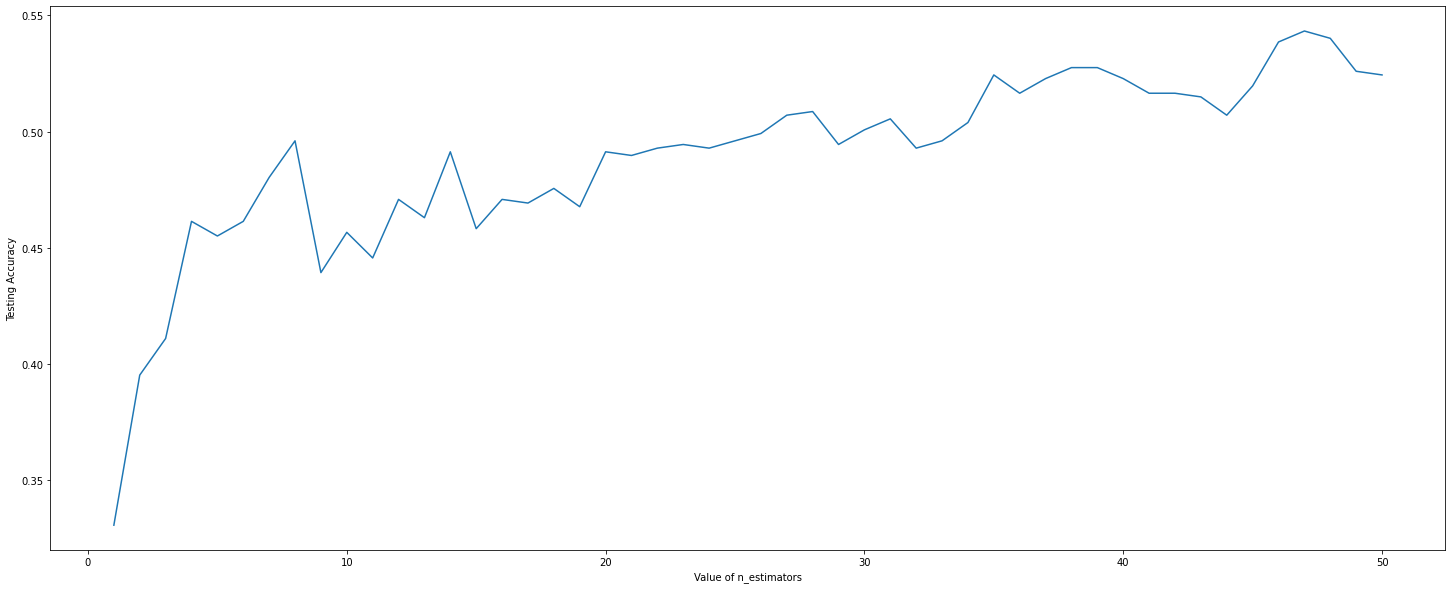

In [20]:
from sklearn.ensemble import AdaBoostClassifier
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [21]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[90 42 21 10]
 [30 80 22 13]
 [36 24 79 29]
 [10 20 33 96]]
              precision    recall  f1-score   support

           0       0.54      0.55      0.55       163
           1       0.48      0.55      0.51       145
           2       0.51      0.47      0.49       168
           3       0.65      0.60      0.63       159

    accuracy                           0.54       635
   macro avg       0.55      0.54      0.54       635
weighted avg       0.55      0.54      0.54       635

Accurecy:  0.5433070866141733




---



---



#Graddient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[108  20  25  10]
 [ 17 107  10  11]
 [ 40  18  96  14]
 [ 13   4  23 119]]
              precision    recall  f1-score   support

           0       0.61      0.66      0.63       163
           1       0.72      0.74      0.73       145
           2       0.62      0.57      0.60       168
           3       0.77      0.75      0.76       159

    accuracy                           0.68       635
   macro avg       0.68      0.68      0.68       635
weighted avg       0.68      0.68      0.68       635

Accurecy:  0.6771653543307087


1/50 round completed......................... Accurecy: 0.49291338582677163
2/50 round completed......................... Accurecy: 0.5464566929133858
3/50 round completed......................... Accurecy: 0.5417322834645669
4/50 round completed......................... Accurecy: 0.5637795275590551
5/50 round completed......................... Accurecy: 0.5669291338582677
6/50 round completed......................... Accurecy: 0.573228346456693
7/50 round completed......................... Accurecy: 0.5811023622047244
8/50 round completed......................... Accurecy: 0.5889763779527559
9/50 round completed......................... Accurecy: 0.5874015748031496
10/50 round completed......................... Accurecy: 0.5905511811023622
11/50 round completed......................... Accurecy: 0.5968503937007874
12/50 round completed......................... Accurecy: 0.5968503937007874
13/50 round completed......................... Accurecy: 0.5921259842519685
14/50 round completed

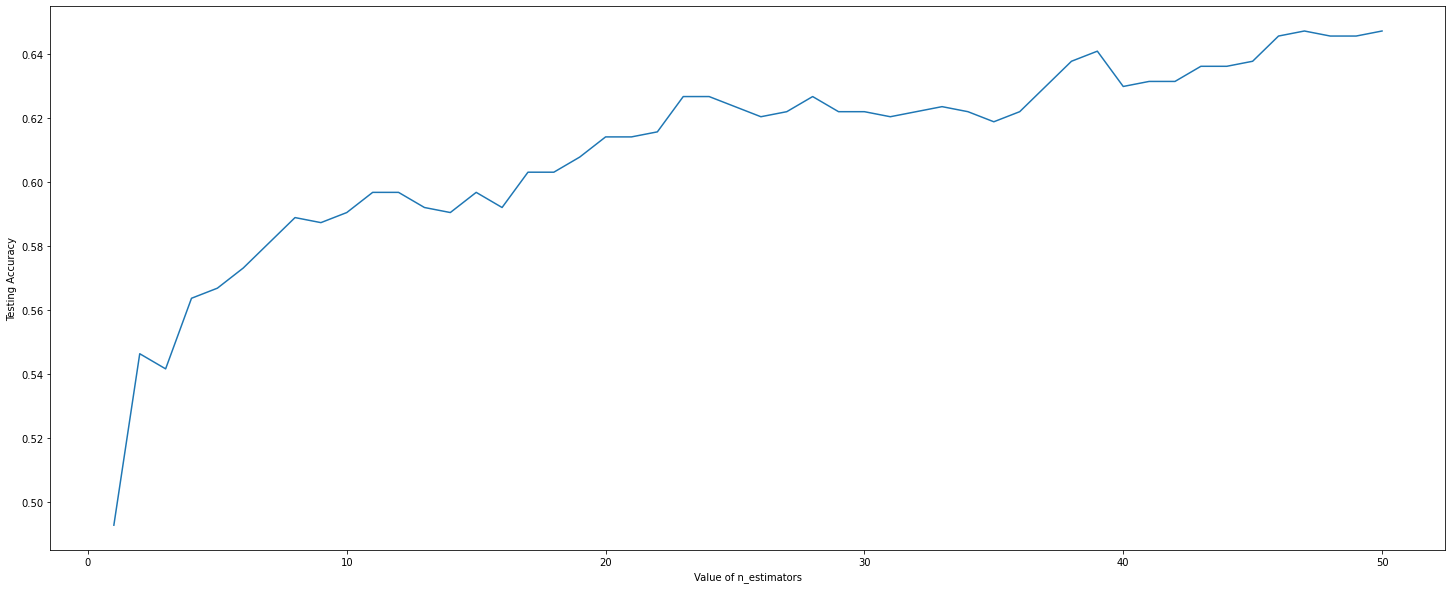

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/14 round completed......................... Accurecy: 0.5511811023622047
2/14 round completed......................... Accurecy: 0.631496062992126
3/14 round completed......................... Accurecy: 0.6771653543307087
4/14 round completed......................... Accurecy: 0.7149606299212599
5/14 round completed......................... Accurecy: 0.7354330708661417
6/14 round completed......................... Accurecy: 0.7606299212598425
7/14 round completed......................... Accurecy: 0.7779527559055118
8/14 round completed......................... Accurecy: 0.7905511811023622
9/14 round completed......................... Accurecy: 0.7779527559055118
10/14 round completed......................... Accurecy: 0.7732283464566929
11/14 round completed......................... Accurecy: 0.7826771653543307
12/14 round completed......................... Accurecy: 0.7700787401574803
13/14 round completed......................... Accurecy: 0.7464566929133858
14/14 round completed.

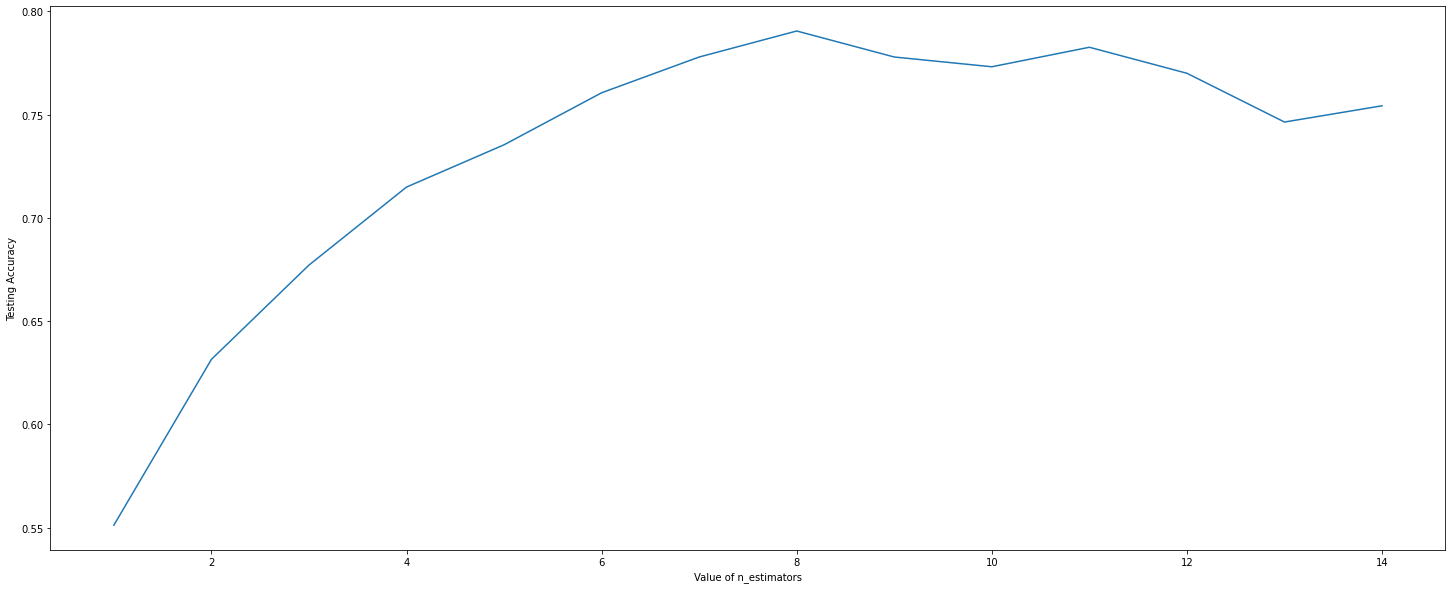

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=14
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[104  25  24  10]
 [ 19 103   9  14]
 [ 38  21  93  16]
 [ 16   5  27 111]]
              precision    recall  f1-score   support

           0       0.59      0.64      0.61       163
           1       0.67      0.71      0.69       145
           2       0.61      0.55      0.58       168
           3       0.74      0.70      0.72       159

    accuracy                           0.65       635
   macro avg       0.65      0.65      0.65       635
weighted avg       0.65      0.65      0.65       635

Accurecy:  0.647244094488189


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[116  15  22  10]
 [ 10 127   4   4]
 [ 26  11 117  14]
 [  5   1  11 142]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       163
           1       0.82      0.88      0.85       145
           2       0.76      0.70      0.73       168
           3       0.84      0.89      0.86       159

    accuracy                           0.79       635
   macro avg       0.79      0.79      0.79       635
weighted avg       0.79      0.79      0.79       635

Accurecy:  0.7905511811023622


In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[111  21  19  12]
 [ 12 124   4   5]
 [ 30  11 112  15]
 [  7   1  12 139]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       163
           1       0.79      0.86      0.82       145
           2       0.76      0.67      0.71       168
           3       0.81      0.87      0.84       159

    accuracy                           0.77       635
   macro avg       0.76      0.77      0.77       635
weighted avg       0.76      0.77      0.76       635

Accurecy:  0.7653543307086614




---



---



#Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[110  22  24   7]
 [ 18 120   5   2]
 [ 19  10 124  15]
 [ 14   1  13 131]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       163
           1       0.78      0.83      0.81       145
           2       0.75      0.74      0.74       168
           3       0.85      0.82      0.83       159

    accuracy                           0.76       635
   macro avg       0.76      0.77      0.77       635
weighted avg       0.76      0.76      0.76       635

Accurecy:  0.7637795275590551


1/150 round completed......................... Accurecy: 0.6031496062992125
2/150 round completed......................... Accurecy: 0.584251968503937
3/150 round completed......................... Accurecy: 0.6440944881889764
4/150 round completed......................... Accurecy: 0.6771653543307087
5/150 round completed......................... Accurecy: 0.7086614173228346
6/150 round completed......................... Accurecy: 0.721259842519685
7/150 round completed......................... Accurecy: 0.721259842519685
8/150 round completed......................... Accurecy: 0.7181102362204724
9/150 round completed......................... Accurecy: 0.7259842519685039
10/150 round completed......................... Accurecy: 0.7181102362204724
11/150 round completed......................... Accurecy: 0.7275590551181103
12/150 round completed......................... Accurecy: 0.7338582677165354
13/150 round completed......................... Accurecy: 0.7275590551181103
14/150 roun

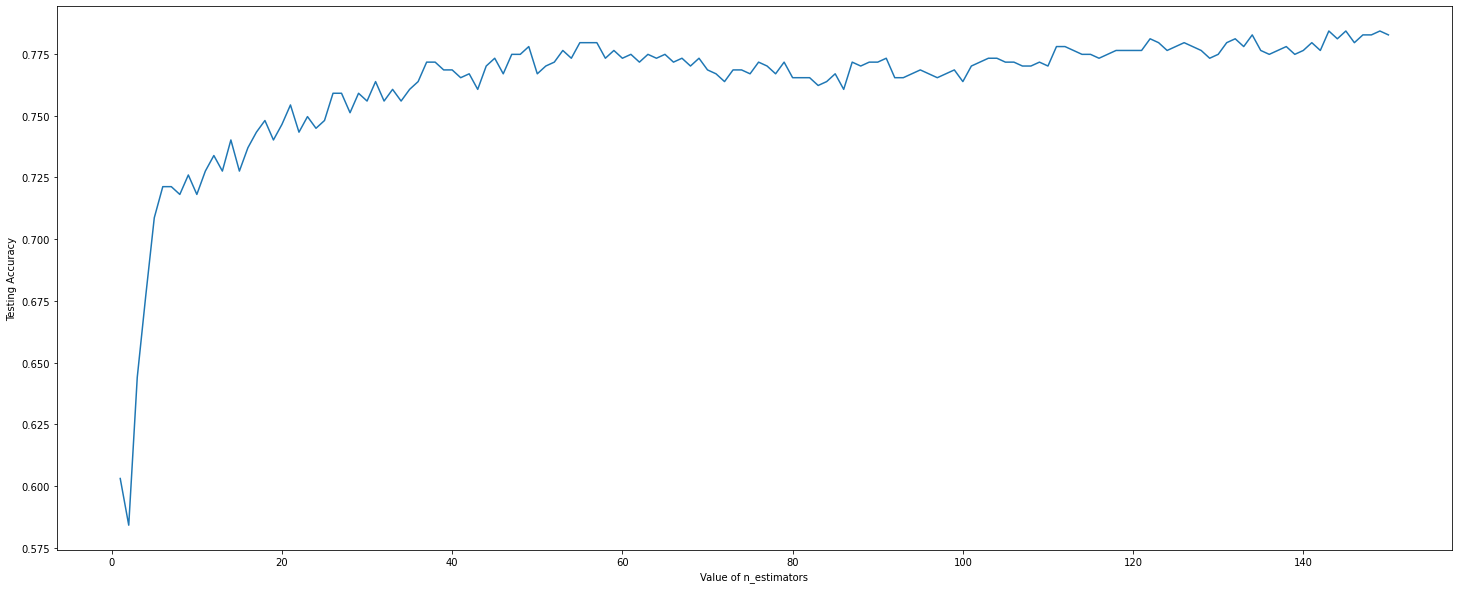

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.431496062992126
2/30 round completed......................... Accurecy: 0.5354330708661418
3/30 round completed......................... Accurecy: 0.5511811023622047
4/30 round completed......................... Accurecy: 0.5748031496062992
5/30 round completed......................... Accurecy: 0.6031496062992125
6/30 round completed......................... Accurecy: 0.6251968503937008
7/30 round completed......................... Accurecy: 0.6692913385826772
8/30 round completed......................... Accurecy: 0.7023622047244095
9/30 round completed......................... Accurecy: 0.7149606299212599
10/30 round completed......................... Accurecy: 0.7417322834645669
11/30 round completed......................... Accurecy: 0.752755905511811
12/30 round completed......................... Accurecy: 0.7669291338582677
13/30 round completed......................... Accurecy: 0.7622047244094489
14/30 round completed..

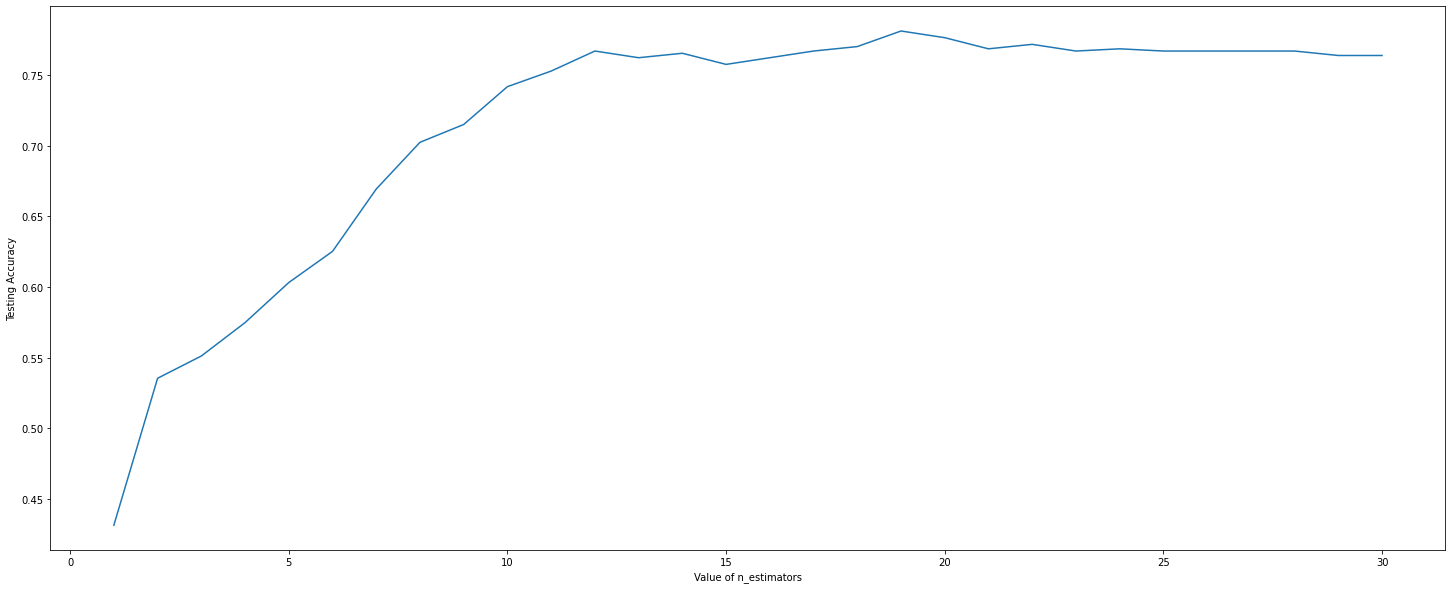

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[118  15  23   7]
 [ 18 119   5   3]
 [ 19  10 128  11]
 [ 14   1  11 133]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       163
           1       0.82      0.82      0.82       145
           2       0.77      0.76      0.76       168
           3       0.86      0.84      0.85       159

    accuracy                           0.78       635
   macro avg       0.79      0.79      0.79       635
weighted avg       0.79      0.78      0.78       635

Accurecy:  0.784251968503937


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[117  13  25   8]
 [ 17 120   6   2]
 [ 18  10 127  13]
 [ 14   1  12 132]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       163
           1       0.83      0.83      0.83       145
           2       0.75      0.76      0.75       168
           3       0.85      0.83      0.84       159

    accuracy                           0.78       635
   macro avg       0.78      0.78      0.78       635
weighted avg       0.78      0.78      0.78       635

Accurecy:  0.7811023622047244


In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[121  11  23   8]
 [ 17 120   5   3]
 [ 18  11 128  11]
 [ 14   2  11 132]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       163
           1       0.83      0.83      0.83       145
           2       0.77      0.76      0.76       168
           3       0.86      0.83      0.84       159

    accuracy                           0.79       635
   macro avg       0.79      0.79      0.79       635
weighted avg       0.79      0.79      0.79       635

Accurecy:  0.7889763779527559




---



---



#XGB

In [63]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train.values,y_train.values)
y_pred = xgb_deafult.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[112  18  23  10]
 [ 25 105   9   6]
 [ 30  17 106  15]
 [ 19   8  23 109]]
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       163
           1       0.71      0.72      0.72       145
           2       0.66      0.63      0.64       168
           3       0.78      0.69      0.73       159

    accuracy                           0.68       635
   macro avg       0.69      0.68      0.68       635
weighted avg       0.69      0.68      0.68       635

Accurecy:  0.6803149606299213


1/250 round completed......................... Accurecy: 0.525984251968504
2/250 round completed......................... Accurecy: 0.5307086614173229
3/250 round completed......................... Accurecy: 0.5811023622047244
4/250 round completed......................... Accurecy: 0.584251968503937
5/250 round completed......................... Accurecy: 0.5937007874015748
6/250 round completed......................... Accurecy: 0.6015748031496063
7/250 round completed......................... Accurecy: 0.5811023622047244
8/250 round completed......................... Accurecy: 0.6
9/250 round completed......................... Accurecy: 0.5968503937007874
10/250 round completed......................... Accurecy: 0.6031496062992125
11/250 round completed......................... Accurecy: 0.6
12/250 round completed......................... Accurecy: 0.6125984251968504
13/250 round completed......................... Accurecy: 0.6141732283464567
14/250 round completed..................

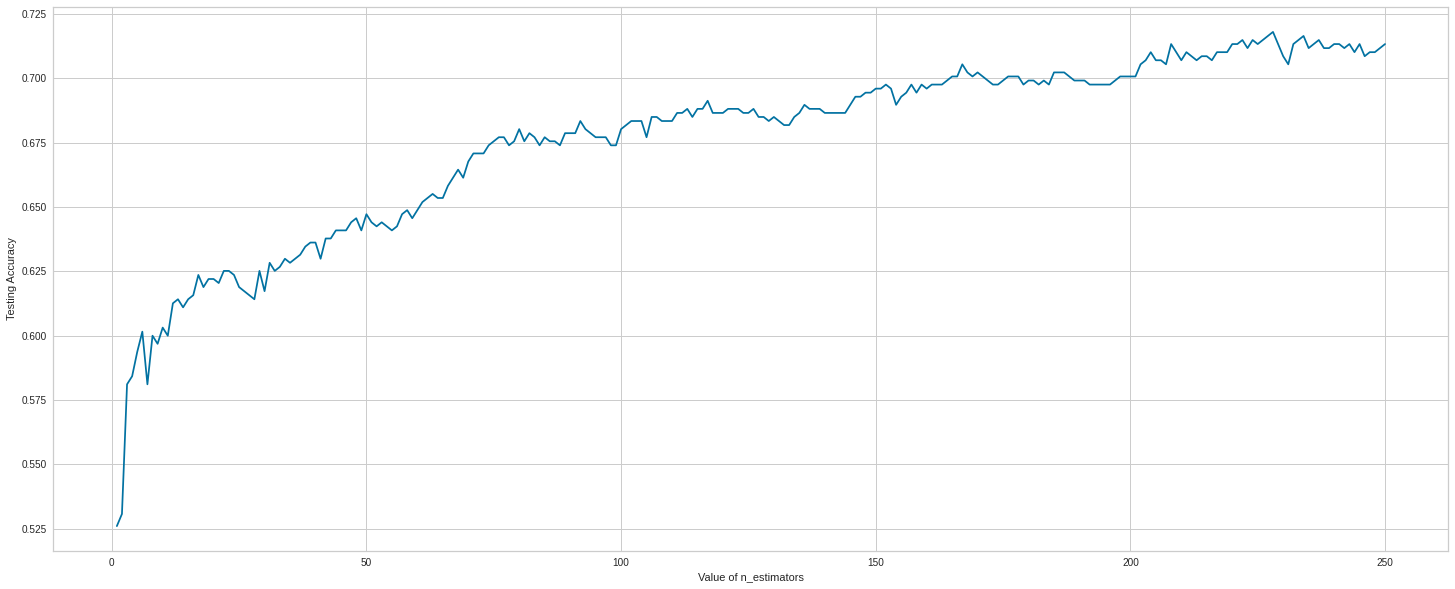

In [64]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)
  y_pred=xgb_classifier.predict(X_test.values)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.5637795275590551
2/30 round completed......................... Accurecy: 0.6330708661417322
3/30 round completed......................... Accurecy: 0.6803149606299213
4/30 round completed......................... Accurecy: 0.7291338582677165
5/30 round completed......................... Accurecy: 0.7401574803149606
6/30 round completed......................... Accurecy: 0.7590551181102362
7/30 round completed......................... Accurecy: 0.7732283464566929
8/30 round completed......................... Accurecy: 0.7826771653543307
9/30 round completed......................... Accurecy: 0.7858267716535433
10/30 round completed......................... Accurecy: 0.7763779527559055
11/30 round completed......................... Accurecy: 0.7763779527559055
12/30 round completed......................... Accurecy: 0.7779527559055118
13/30 round completed......................... Accurecy: 0.7716535433070866
14/30 round completed

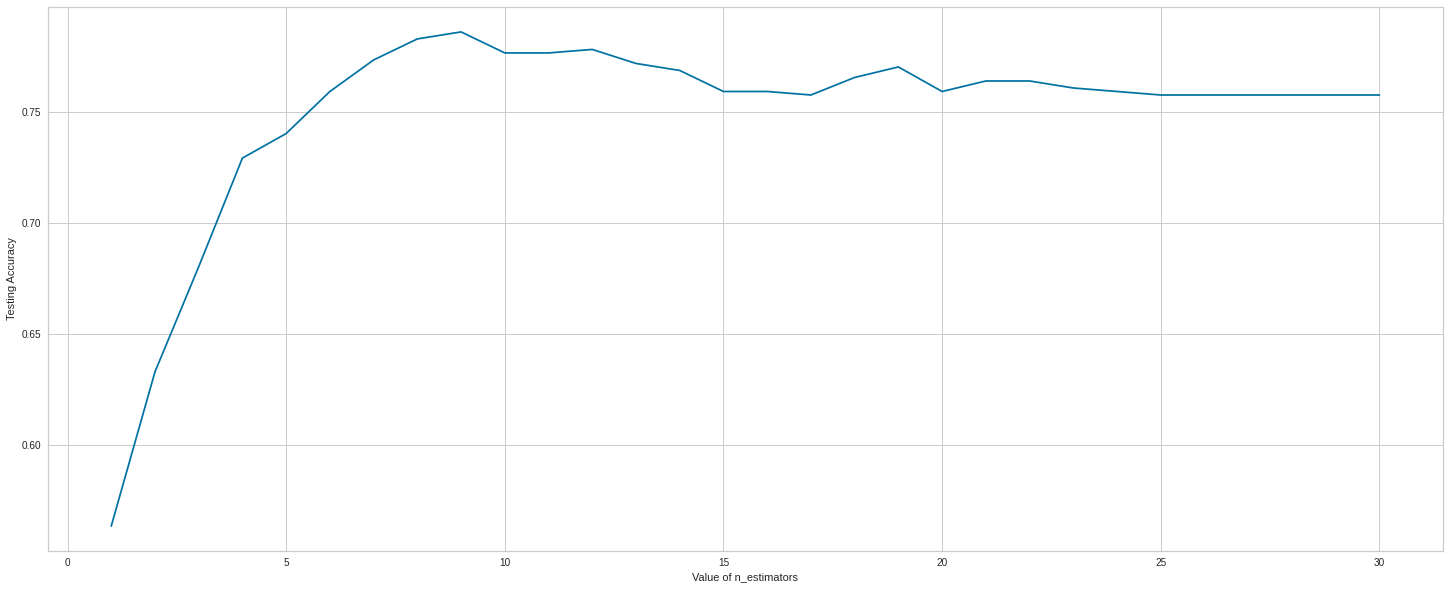

In [65]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)
  y_pred=xgb_classifier.predict(X_test.values)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [66]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train.values,y_train.values)
y_pred = xgb_depth.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[121  14  23   5]
 [ 12 124   4   5]
 [ 23  10 126   9]
 [ 10   6  15 128]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       163
           1       0.81      0.86      0.83       145
           2       0.75      0.75      0.75       168
           3       0.87      0.81      0.84       159

    accuracy                           0.79       635
   macro avg       0.79      0.79      0.79       635
weighted avg       0.79      0.79      0.79       635

Accurecy:  0.7858267716535433
XGBClassifier(max_depth=9, objective='multi:softprob')


In [67]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train.values,y_train.values)
y_pred = xgb_estimator.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[113  18  27   5]
 [ 21 112   5   7]
 [ 26  15 117  10]
 [ 15   4  26 114]]
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       163
           1       0.75      0.77      0.76       145
           2       0.67      0.70      0.68       168
           3       0.84      0.72      0.77       159

    accuracy                           0.72       635
   macro avg       0.73      0.72      0.72       635
weighted avg       0.72      0.72      0.72       635

Accurecy:  0.7181102362204724
XGBClassifier(n_estimators=228, objective='multi:softprob')


In [68]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train.values,y_train.values)
y_pred = xgb_all.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[120  16  21   6]
 [ 12 124   4   5]
 [ 21   9 130   8]
 [  9   4  17 129]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       163
           1       0.81      0.86      0.83       145
           2       0.76      0.77      0.76       168
           3       0.87      0.81      0.84       159

    accuracy                           0.79       635
   macro avg       0.79      0.79      0.79       635
weighted avg       0.79      0.79      0.79       635

Accurecy:  0.7921259842519685


#KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[ 90  37  12  24]
 [ 25 107   6   7]
 [ 25  21 102  20]
 [ 24   8  20 107]]
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       163
           1       0.62      0.74      0.67       145
           2       0.73      0.61      0.66       168
           3       0.68      0.67      0.68       159

    accuracy                           0.64       635
   macro avg       0.64      0.64      0.64       635
weighted avg       0.64      0.64      0.64       635

Accurecy:  0.6393700787401575


1/105 round completed......................... Accurecy: 0.7307086614173228
2/105 round completed......................... Accurecy: 0.6677165354330709
3/105 round completed......................... Accurecy: 0.6929133858267716
4/105 round completed......................... Accurecy: 0.658267716535433
5/105 round completed......................... Accurecy: 0.6393700787401575
6/105 round completed......................... Accurecy: 0.6204724409448819
7/105 round completed......................... Accurecy: 0.5874015748031496
8/105 round completed......................... Accurecy: 0.5952755905511811
9/105 round completed......................... Accurecy: 0.5921259842519685
10/105 round completed......................... Accurecy: 0.6
11/105 round completed......................... Accurecy: 0.5858267716535434
12/105 round completed......................... Accurecy: 0.5811023622047244
13/105 round completed......................... Accurecy: 0.5700787401574803
14/105 round completed..

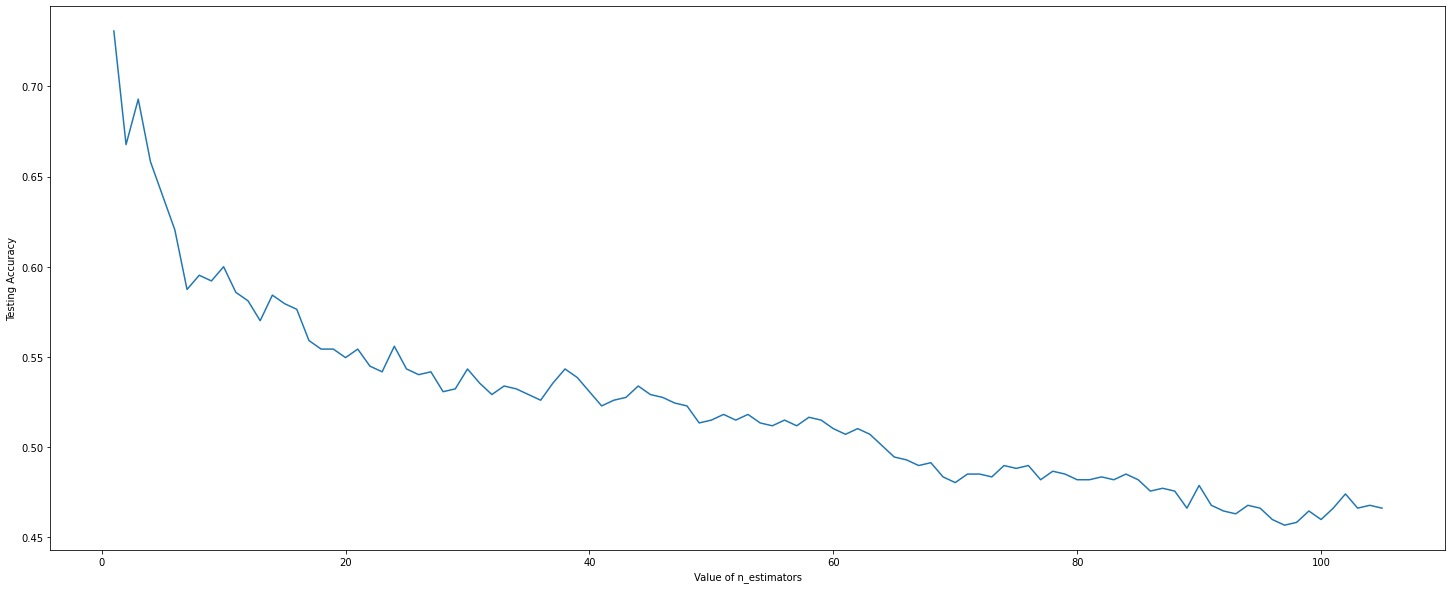

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[ 88  32  20  23]
 [ 13 119   7   6]
 [ 13  12 131  12]
 [  9   8  16 126]]
              precision    recall  f1-score   support

           0       0.72      0.54      0.62       163
           1       0.70      0.82      0.75       145
           2       0.75      0.78      0.77       168
           3       0.75      0.79      0.77       159

    accuracy                           0.73       635
   macro avg       0.73      0.73      0.73       635
weighted avg       0.73      0.73      0.73       635

Accurecy:  0.7307086614173228


#NB

In [31]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[81 23 18 41]
 [31 56 21 37]
 [26 29 88 25]
 [12 16 41 90]]
              precision    recall  f1-score   support

           0       0.54      0.50      0.52       163
           1       0.45      0.39      0.42       145
           2       0.52      0.52      0.52       168
           3       0.47      0.57      0.51       159

    accuracy                           0.50       635
   macro avg       0.50      0.49      0.49       635
weighted avg       0.50      0.50      0.49       635

Accurecy:  0.49606299212598426




---



---



#Result

In [72]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()


AdaBoostClassifier(random_state=0) 1  :  0.5244094488188976
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=47, random_state=0) 1  :  0.5433070866141733
---------------------------------------------------------------

RandomForestClassifier(random_state=0) 3  :  0.7637795275590551
---------------------------------------------------------------

RandomForestClassifier(n_estimators=143, random_state=0) 3  :  0.784251968503937
---------------------------------------------------------------

RandomForestClassifier(max_depth=19, random_state=0) 3  :  0.7811023622047244
---------------------------------------------------------------

RandomForestClassifier(max_depth=19, n_estimators=143, random_state=0) 3  :  0.7889763779527559
---------------------------------------------------------------

KNeighborsClassifier() 5  :  0.6393700787401575
---------------------------------------------------------------

KNeighborsClassifier(n_neighbors=1) 5  : 

In [73]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(XGBClassifier(max_depth=9, n_estimators=228, objective='multi:softprob'), 4, 'xgboost')   :  0.7921259842519685
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(max_depth=19, n_estimators=143, random_state=0), 3, 'RandomForestClassifier')   :  0.7889763779527559
-------------------------------------------------------------------------------------------------
(XGBClassifier(max_depth=9, objective='multi:softprob'), 4, 'xgboost')   :  0.7858267716535433
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(n_estimators=143, random_state=0), 3, 'RandomForestClassifier')   :  0.784251968503937
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(max_depth=19, random_state=0), 3, 'RandomForestClassifier')   :  0.7811023622047244
-------------------------------------------------------

In [74]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(XGBClassifier(max_depth=9, n_estimators=228, objective='multi:softprob'), 'xgboost')
(RandomForestClassifier(max_depth=19, n_estimators=143, random_state=0), 'RandomForestClassifier')
(KNeighborsClassifier(n_neighbors=1), 'KNeighborsClassifier')
(AdaBoostClassifier(n_estimators=47, random_state=0), 'AdaBoostClassifier')


In [75]:
len(best_models)

4

#Performance parameter for each class

In [36]:

def confusion_details(y_test,y_pred):
    labels = list(set(y_test))
    labels.sort()

    print("Total labels: %s -> %s" % (len(labels), labels))

    df = pd.DataFrame(
        data=confusion_matrix(y_test, y_pred, labels=labels),
        columns=labels,
        index=labels
    )

    print(df)

    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Local (metrics per class)
    #
    tps = {}
    fps = {}
    fns = {}
    tns = {}

    precision_local = {}
    recall_local = {}
    f1_local = {}
    accuracy_local = {}
    specificity_local={}

    for label in labels:
        tps[label] = df.loc[label, label]
        fps[label] = df[label].sum() - tps[label]
        fns[label] = df.loc[label].sum() - tps[label]
        tns[label]=len(y_test) - (tps[label] + fps[label] + fns[label])
        
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        
        precision_local[label] = tp / (tp + fp) if (tp + fp) > 0. else 0.
        specificity_local[label] = tn / (tn + fp) if (tn + fp) > 0. else 0.
        recall_local[label] = tp / (tp + fn) if (tp + fp) > 0. else 0.
        p, r = precision_local[label], recall_local[label]
        
        f1_local[label] = 2. * p * r / (p + r) if (p + r) > 0. else 0.
        accuracy_local[label] = tp / (tp + fp + fn) if (tp + fp + fn) > 0. else 0.



    print("#-- Local measures --#")
    print("True Positives(TP):", tps)
    print("False Positives(FP):", fps)
    print("True Negatives(TN):", tns)
    print("False Negatives(FN):", fns)
    print("----------------------------")

    print("Precision:", precision_local)
    print("Recall/Sensitivity:", recall_local)
    print("Specificity:",specificity_local)
    print("F1-Score:", f1_local)
    print("Accuracy:", accuracy_local)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Global
    #
    micro_averages = {}
    macro_averages = {}

    correct_predictions = sum(tps.values())
    true_negative=sum(tns.values())

    den = sum(list(tps.values()) + list(fps.values()))
    micro_averages["Precision"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tps.values()) + list(fns.values()))
    micro_averages["Recall"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tns.values()) + list(fps.values()))
    micro_averages["Specificity"] = 1. * true_negative / den if den > 0. else 0.


    micro_avg_p, micro_avg_r = micro_averages["Precision"], micro_averages["Recall"]
    micro_averages["F1-score"] = 2. * micro_avg_p * micro_avg_r / (micro_avg_p + micro_avg_r) if (micro_avg_p + micro_avg_r) > 0. else 0.

    macro_averages["Precision"] = np.mean(list(precision_local.values()))
    macro_averages["Recall"] = np.mean(list(recall_local.values()))
    macro_averages["Specificity"]=np.mean(list(specificity_local.values()))


    macro_avg_p, macro_avg_r = macro_averages["Precision"], macro_averages["Recall"]
    macro_averages["F1-Score"] = 2. * macro_avg_p * macro_avg_r / (macro_avg_p + macro_avg_r) if (macro_avg_p + macro_avg_r) > 0. else 0.

    total_predictions = df.values.sum()
    accuracy_global = correct_predictions / total_predictions if total_predictions > 0. else 0.

    print("#-- Global measures --#")
    print("Micro-Averages:", micro_averages)
    print("Macro-Averages:", macro_averages)
    print("Correct predictions:", correct_predictions)
    print("Total predictions:", total_predictions)
    print("Accuracy:", accuracy_global)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()



    accuracy_local_new = {}
    for label in labels:
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        accuracy_local_new[label] = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0. else 0.

    total_true = sum(list(tps.values()) + list(tns.values()))
    total_predictions = sum(list(tps.values()) + list(tns.values()) + list(fps.values()) + list(fns.values()))
    accuracy_global_new = 1. * total_true / total_predictions if total_predictions > 0. else 0.

    print("Accuracy (per class), with TNs:", accuracy_local_new)
    print("Accuracy (per class), without TNs:", accuracy_local)
    print("Accuracy (global), with TNs:", accuracy_global_new)
    print("Accuracy (global), without TNs:", accuracy_global)

In [37]:
new_keys_10=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=47, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=143, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=19, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=19, n_estimators=143, random_state=0)', in…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [38]:
for i in range(len(new_keys_10)):
  if new_keys_10[i].value ==True:
    print("\n")
    print("_________________________________________________",models[i],"_______________________________________________")

    if str(models[i])[:3] == "XGB":
      y_pred = models[i].predict(X_test.values)
      confusion_details(y_test,y_pred)
    
    else:
      y_pred = models[i].predict(X_test)
      confusion_details(y_test,y_pred)
    print('\n')
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print('\n')
    print('\n')

#Testing Accuracy For Best 4 Models

In [39]:

for i in best_models:
  print("--------------------------------------------------")
  print()
  if str(i[0])[:3] == "XGB":
    y_pred=i[0].predict(X_test.values)
  else:
    y_pred=i[0].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("Accurecy: ",accuracy_score(y_test, y_pred))

--------------------------------------------------

[[121  11  23   8]
 [ 17 120   5   3]
 [ 18  11 128  11]
 [ 14   2  11 132]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       163
           1       0.83      0.83      0.83       145
           2       0.77      0.76      0.76       168
           3       0.86      0.83      0.84       159

    accuracy                           0.79       635
   macro avg       0.79      0.79      0.79       635
weighted avg       0.79      0.79      0.79       635

Accurecy:  0.7889763779527559
--------------------------------------------------

[[ 88  32  20  23]
 [ 13 119   7   6]
 [ 13  12 131  12]
 [  9   8  16 126]]
              precision    recall  f1-score   support

           0       0.72      0.54      0.62       163
           1       0.70      0.82      0.75       145
           2       0.75      0.78      0.77       168
           3       0.75      0.79      0.77       159

    a

#SHAP

In [40]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.2 MB/s eta 0:00:00


In [41]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test)
  features_names=list_of_feat

  if 'Subjects' in features_names:
    features_names.pop(0)


  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"],feature_names=features_names)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("---------------------")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])

In [42]:
new_keys_7=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=47, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=143, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=19, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=19, n_estimators=143, random_state=0)', in…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [43]:
graph_feat={
    "max_display":20,
    "shap_values Index":2
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Testing

In [126]:
def Conf_Mat(X_,y_,attb,keys):

  import matplotlib.pyplot as plt
  from yellowbrick.classifier import ConfusionMatrix
  import matplotlib.dates as dates

  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)


  for i in range(len(keys)):
    if keys[i].value ==True:
      cm = ConfusionMatrix(models[i], classes=['Reading', 'Resting', 'Walking', 'Working'],fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax)

      if str(models[i])[:3] == "XGB":
        cm.fit(X_train.values, y_train.values)
        cm.score(X_.values, y_.values)
      else:
        cm.fit(X_train, y_train)
        cm.score(X_, y_)
      
      cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
      cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
      cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
      cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
      for label in ax.get_xticklabels():
        label.set_fontweight(550)
      for label in ax.get_yticklabels():
        label.set_fontweight(550)
      
      plt.savefig(attb["type"]+"_Confusion_mat("+str(models[i])+").png")
      cm.show()
      print("--------------------")
      print("--------------------")

###Testing

In [76]:
new_keys_6=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=47, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=143, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=19, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=19, n_estimators=143, random_state=0)', in…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=9, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=228, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=9, n_estimators=228, objective='multi:softprob')", …

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



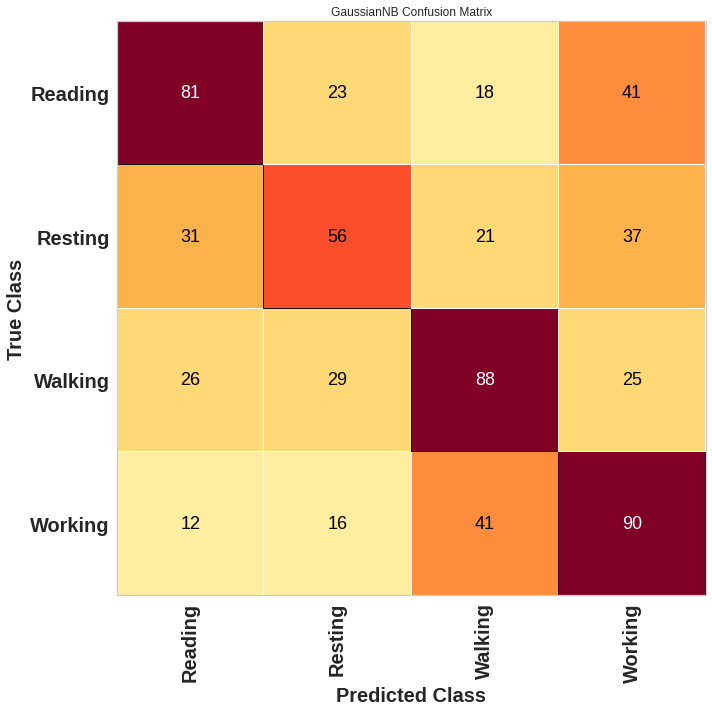

--------------------
--------------------


<Figure size 432x288 with 0 Axes>

--------------------
--------------------


In [128]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10, 
    
  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18,
  "type"  : "Testing"

}

Conf_Mat(X_test,y_test,attributes,new_keys_6)

###Training

In [123]:
new_keys_5=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=47, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=143, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=19, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=19, n_estimators=143, random_state=0)', in…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=9, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=228, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=9, n_estimators=228, objective='multi:softprob')", …

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names



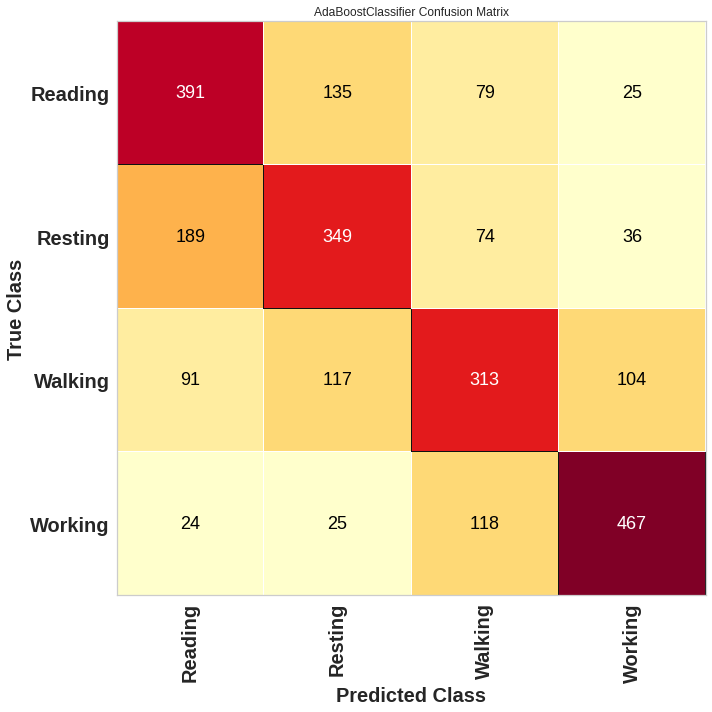

--------------------
--------------------


In [127]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10, 
    
  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18,
  "type"  : "Training"

}

Conf_Mat(X_train,y_train,attributes,new_keys_5)

#ROC FOR MULTICLASS

In [55]:
!pip install plotly==5.11.0
!pip install -U kaleido


import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

def ploty_ROC(model,X,y,fig_name,graph_attributes):
    
    lebel_dict={
    0: 'Reading',
    1: 'Resting',
    2: 'Walking',
    3: 'Working'
    }
    if str(model)[:3] == "XGB":
      y_scores = model.predict_proba(X.values)
    else:
      y_scores = model.predict_proba(X)
    #y_scores = model.predict_proba(X)

    y_onehot = pd.get_dummies(y, columns=model.classes_)

    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(y_scores.shape[1]):
        y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)
        name = f"<b>{lebel_dict[y_onehot.columns[i]]} (AUC={auc_score:.2f})</b>"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout(
        xaxis_title='<b>False Positive Rate</b>',
        yaxis_title='<b>True Positive Rate</b>',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=1000, height=1000,
        font=dict(
            family="Courier New, monospace",
            size=graph_attributes["Font Size"],
            color=graph_attributes["Font Color"]
        ),
        legend=dict(
            x=0.62,
            y=0.05,
            traceorder="reversed",
            title_font_family="Times New Roman",
            font=dict(
                family="Courier New, monospace",
                size=graph_attributes["Legend Font Size"],
                color=graph_attributes["Legend Font Color"]
            ),
            bgcolor=graph_attributes["Legend bgcolor"],
            bordercolor=graph_attributes["Legend bordercolor"],
            borderwidth=graph_attributes["Legend borderwidth"]
        ),
        #plot_bgcolor="",
    )
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black')
    fig.show()
    fig.write_image(fig_name+".png")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
new_keys_9=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=47, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=143, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=19, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=19, n_estimators=143, random_state=0)', in…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [57]:

#Change the attriutes for graph
graph_attributes={
    "Font Size"  : 20,
    "Font Color" : "black",

    "Legend Font Size"  : 20,
    "Legend Font Color" : "black",
    "Legend bgcolor"    : "LightSteelBlue",
    "Legend bordercolor": "White",
    "Legend borderwidth": 2

}



for i in range(len(new_keys_9)):
  if new_keys_9[i].value ==True:
    print(models[i])
    #Change dataset training or testing by replacing X_new and y_new
    ploty_ROC(models[i],X_new,y_new,str(models[i]),graph_attributes)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

KNeighborsClassifier()


---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------


#Cross_val_score function

In [ ]:
from sklearn.model_selection import cross_val_score

k=5
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new, y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

AdaBoostClassifier(random_state=0)  -> Accuracy:  0.5181102362204725
AdaBoostClassifier(random_state=0)  -> AVG Accurecy After CV: 0.5053975508581932 (For 5 Fold)
--------------------------------------------------------------------------
AdaBoostClassifier(n_estimators=48, random_state=0)  -> Accuracy:  0.5228346456692914
AdaBoostClassifier(n_estimators=48, random_state=0)  -> AVG Accurecy After CV: 0.5035067935120098 (For 5 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(random_state=0)  -> Accuracy:  0.6771653543307087
GradientBoostingClassifier(random_state=0)  -> AVG Accurecy After CV: 0.6816210039991059 (For 5 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(n_estimators=45, random_state=0)  -> Accuracy:  0.6566929133858268
GradientBoostingClassifier(n_estimators=45, random_state=0)  -> AVG Accurecy After CV: 0.6390571052435481 (For 5 Fold)
-----------------------

# **LIME**

In [68]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=4bb1c30472090b8fcd3ed93d00098d7183ecb5c12c78c61b8e08b813c83d6106
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [98]:

  def LIME_EXP(model,row):
    import lime
    from lime import lime_tabular


    if str(model)[:3] == "XGB":

      """explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=list(list(X_new.columns)),                                         
        class_names=['Reading', 'Resting', 'Walking', 'Working']
        )
      
      exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 model.predict_proba,
                                 num_features=6,
                                 top_labels=2)"""
      print("Plz RUN XGboost cell....")
      return None



    else:
      explainer = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
        feature_names=list(X_new.columns),
        class_names=['Reading', 'Resting', 'Walking', 'Working'],
        mode='classification'
        )

      exp = explainer.explain_instance(X_test.iloc[row],
                                      model.predict_proba,               
                                      num_features=6,
                                      top_labels=4)
    


    exp.show_in_notebook(show_table=True, show_all=True)



    import matplotlib.pyplot as plt
    with plt.style.context("ggplot"):
        exp.as_pyplot_figure()


    from IPython.display import HTML
    html_data = exp.as_html()
    HTML(data=html_data)

    exp.save_to_file(str(model)+".html")

In [99]:
row = int(input("Enter the index of row to explain: "))      # the index of row to be explained in LIME


new_keys_8=models_check_box(models)

Enter the index of row to explain: 7


Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=40, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=47, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=8, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=8, n_estimators=47, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=102, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=102, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=8, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=239, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=8, n_estimators=239, objective='multi:softprob')", …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

GradientBoostingClassifier(random_state=0)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names



---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------


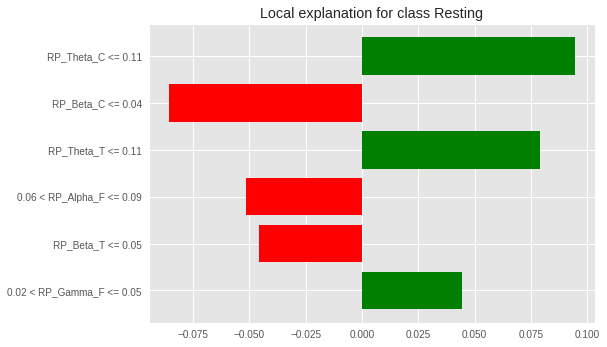

In [100]:
for i in range(len(new_keys_8)):
  if new_keys_8[i].value ==True:
    print(models[i])
    LIME_EXP(models[i],row)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

### LIME for XGboost

In [ ]:
row = 18  ## the index of row to be explained in LIME

import lime
from lime import lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=list(list(X_new.columns)),
                                                   class_names=['Reading', 'Resting', 'Walking', 'Working'])

####Default

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_deafult.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_deafult)+".html")

####Best Max Depth

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_depth.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_depth)+".html")

####Best N Estimator

In [ ]:


exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_estimator.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_estimator)+".html")

####Best Depth and Best Estimator

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_all.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)


import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_all)+".html")